# 一些好玩的功能

In [1]:
from mongo_main import *
import numpy as np

# 连接MongoDB
mongo = mongo_db('maoyan')

# 获取所有 Top100 的电影数据
top_100s = mongo.top_100.find()

# 修改为DataFrame可以查看的格式
df = pd.DataFrame(top_100s).drop("_id", axis=1)

## 电影名字词云

### matplotlib 绘制

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import jieba
from PIL import Image

def create_word_cloud(words):
    """
    Matplotlib 绘制所有电影名词云
    :param words: 电影名
    :return: None
    """
    # 设置停用词
    stopwords = set(STOPWORDS)
    stopwords.update(['电影', '猫眼'])
    cut_text = ' '.join(jieba.cut(words, cut_all=False, HMM=True))
    print(cut_text)
    wc = WordCloud(
        mask=np.array(Image.open("images/nezha.jpg")),  # 设置词云形状
        background_color='white',  # 设置背景颜色
        font_path='../fonts/msyh.ttf',  # 设置字体，针对中文的情况需要设置中文字体，否则显示乱码
        max_words=100,  # 设置字体最大值
        width=1080,  # 设置画布的宽度
        height=1900,  # 设置画布的高度
        random_state=30,  # 设置多少种随机状态，即多少种颜色
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file('images/word_cloud_matplotlib.jpg')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [3]:
words = ''.join(df.title)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.065 seconds.
Prefix dict has been built succesfully.


霸王别姬 肖申克 的 救赎 罗马 假日 这个 杀手 不 太冷 泰坦尼克号 唐伯虎 点秋香 魂断蓝桥 乱世佳人 天空 之 城 辛德勒 的 名单 喜剧之王 大闹天宫 音乐 之声 春光乍泄 剪刀手 爱德华 美丽 人生 海上 钢琴师 黑客帝国 哈利 · 波特 与 魔法石 指环王 3 ： 王者 无敌 蝙蝠侠 ： 黑暗 骑士 楚门 的 世界 加勒比海 盗 射雕 英雄传 之 东成西就 无间道 教父 2 机器人 总动员 指环王 1 ： 护戒 使者 指环王 2 ： 双塔 奇兵 狮子王 活着 天堂 电影院 拯救 大兵 瑞恩 哈尔 的 移动 城堡 忠犬八公 的 故事 疯狂 原始人 盗梦 空间 幽灵公主 东邪西毒 阿凡 达 搏击 俱乐部 风之谷 V 字 仇杀 队 十二 怒汉当 幸福 来 敲门 驯龙 高手 速度 与 激情 5 放牛班 的 春天 勇敢 的 心神 偷奶 爸 闻香识 女人 飞屋 环 游记 三 傻大闹 宝莱坞 怦然心动 断背山 黑客帝国 3 ： 矩阵 革命 少年 派 的 奇幻 漂流 末代皇帝 鬼子 来 了 大话西游 之 月光宝盒 致命 魔术 美丽 心灵 无敌 破坏 王 哈利 · 波特 与 死亡 圣器 （ 下 ） 倩女幽魂 夜访 吸血鬼 蝙蝠侠 ： 黑暗 骑士 崛起 钢琴家 本杰明 · 巴顿 奇事 甜蜜蜜 初恋 这件 小事 触 不可 及 新 龙门客栈 熔炉 大话西游 之 大圣 娶亲 小鞋子 教父 素媛 萤火 之森 穿 条纹 睡衣 的 男孩 窃听 风暴 时空 恋 旅人 7 号房 的 礼物 恐怖 直播 海豚 湾 忠犬八公 物语 上帝 之 城 美国 往事 七 武士 完美 的 世界 一一 英雄本色 阿飞 正传 爱 · 回家 海洋 我爱你 黄金 三 镖客 迁徙的鸟 龙猫 千与千寻


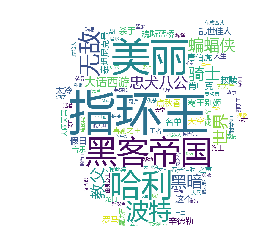

In [4]:
create_word_cloud(words)

### pyecharts 绘制

In [5]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType


def word_cloud_diamond(words) -> WordCloud:
    """
    pyecharts 绘制所有电影名词云
    :param words: [(word, counts)] 元组列表
    :return: pyecharts wordcloud 对象
    """
    c = (WordCloud().add("",
                         words,
                         word_size_range=[10, 50],
                         shape=SymbolType.DIAMOND).set_global_opts(
                             title_opts=opts.TitleOpts(title="猫眼电影Top100")))
    return c

words = [(i, j) for i, j in zip(df.title[::-1], range(1, 101))]
print(words[:10])
Page().add(word_cloud_diamond(words)).render_notebook()

[('千与千寻', 1), ('龙猫', 2), ('迁徙的鸟', 3), ('黄金三镖客', 4), ('我爱你', 5), ('海洋', 6), ('爱·回家', 7), ('阿飞正传', 8), ('英雄本色', 9), ('一一', 10)]


![image](https://raw.githubusercontent.com/hufe09/maoyan_top100/master/images/word_cloud_echarts.png)

In [6]:
from PIL import Image
img = Image.open("top_100_posters/1.jpg")
print(img.size, img.format, img.mode, img.bits)

(494, 732) JPEG RGB 8


## 组合海报

In [7]:
import os
import math
import random
from PIL import Image


def create_img():
    """
    将每部电影的海报组成成20*5的大海报
    :return: None
    """

    x = 0
    y = 0
    img_dir = 'top_100_posters/'
    images = os.listdir(img_dir)  # 返回目录下的文件列表
    random.shuffle(images)  # 将文件列表随机排序

    width = 200  # 设置单个海报的宽度
    height = int(width * 4 / 3)  # 设置单个图片的高度， 各海报比例设置为4:3
    num_line = 5  # 每行显示图片数
    out_length = int(width * num_line)  # 最终图片的宽度
    out_height = int(height * (len(images) / num_line))  # 最终图片的高度
    new_img = Image.new('RGBA', (out_length, out_height))  # 创建 长*宽 的图片用于填充各小海报

    for i in images:  # 对每一张图片逐个进行处理
        try:
            img = Image.open(img_dir + i)
        except IOError:
            print(f"第{i}张图片为空")  # 可能会出现某张图片为空的情况
        else:
            img = img.resize((width, height), Image.ANTIALIAS)  # 缩小图片
            new_img.paste(img, (x * width, y * height))  # 拼接图片，一行排满，换行拼接
            x += 1
            if x >= num_line:
                x = 0
                y += 1
    print('图片绘制完成')

    new_img.save("images/mixed_posters.png")
    # newImg.show()

create_img()

图片绘制完成


[查看图片](https://raw.githubusercontent.com/hufe09/maoyan_top100/master/images/mixed_posters.png)

## 汇总演员

In [9]:
stars = ','.join(df.stars)
stars = set(stars.split(','))
print(f"Top100的电影中,共有 {len(stars)} 位演员")

Top100的电影中,共有 250 位演员


In [11]:
def count_stars(movies):
    """
    统计每位演员参演的电影及数量
    :param movies: DataFrame  电影数据
    :return: star_movies， 元组列表， 每位演员参演的电影名及数量
    """
    stars = ','.join(movies.stars)
    stars = set(stars.split(','))
    star_movies = {}
    for star in stars:
        titles = []
        for i in range(df.stars.shape[0]):
            if star in df.stars.iloc[i]:
                titles.append(df.title.iloc[i])
        star_movies[star] = len(titles), titles
    star_movies = sorted(star_movies.items(),
                         key=lambda x: x[1][0], reverse=True)
    return star_movies


count_stars(df)

[('张国荣', (7, ['霸王别姬', '春光乍泄', '射雕英雄传之东成西就', '东邪西毒', '倩女幽魂', '英雄本色', '阿飞正传'])),
 ('周星驰', (4, ['唐伯虎点秋香', '喜剧之王', '大话西游之月光宝盒', '大话西游之大圣娶亲'])),
 ('梁朝伟', (4, ['春光乍泄', '射雕英雄传之东成西就', '无间道', '东邪西毒'])),
 ('巩俐', (3, ['霸王别姬', '唐伯虎点秋香', '活着'])),
 ('阿尔·帕西诺', (3, ['教父2', '闻香识女人', '教父'])),
 ('伊莱贾·伍德', (3, ['指环王3：王者无敌', '指环王1：护戒使者', '指环王2：双塔奇兵'])),
 ('莫文蔚', (3, ['喜剧之王', '大话西游之月光宝盒', '大话西游之大圣娶亲'])),
 ('伊恩·麦克莱恩', (3, ['指环王3：王者无敌', '指环王1：护戒使者', '指环王2：双塔奇兵'])),
 ('克里斯蒂安·贝尔', (3, ['蝙蝠侠：黑暗骑士', '致命魔术', '蝙蝠侠：黑暗骑士崛起'])),
 ('张曼玉', (3, ['甜蜜蜜', '新龙门客栈', '阿飞正传'])),
 ('布拉德·皮特', (3, ['搏击俱乐部', '夜访吸血鬼', '本杰明·巴顿奇事'])),
 ('丽芙·泰勒', (3, ['指环王3：王者无敌', '指环王1：护戒使者', '指环王2：双塔奇兵'])),
 ('雅克·贝汉', (2, ['海洋', '迁徙的鸟'])),
 ('姜文', (2, ['鬼子来了', '海洋'])),
 ('莱昂纳多·迪卡普里奥', (2, ['泰坦尼克号', '盗梦空间'])),
 ('娜塔莉·波特曼', (2, ['这个杀手不太冷', 'V字仇杀队'])),
 ('迈克尔·凯恩', (2, ['致命魔术', '蝙蝠侠：黑暗骑士崛起'])),
 ('丹尼尔·雷德克里夫', (2, ['哈利·波特与魔法石', '哈利·波特与死亡圣器（下）'])),
 ('基努·里维斯', (2, ['黑客帝国', '黑客帝国3：矩阵革命'])),
 ('凯瑞-安·莫斯', (2, ['黑客帝国', '黑客帝国3：矩阵革命'])),
 ('岛本须美', (2, ['风之谷', '龙

## 探索演员之间的关系

关联规则挖掘可以让我们从数据集中发现项与项（item 与 item）之间的关系，它在我们的生活中有很多应用场景，典型的例子就是啤酒与尿布，“购物篮分析”就是一个常见的场景，这个场景可以从消费者交易记录中发掘商品与商品之间的关联关系，进而通过商品捆绑销售或者相关推荐的方式带来更多的销售量。所以说，关联规则挖掘是个非常有用的技术。
下面通过Apriori 算法看一下演员之间存在什么样的关系。

### Apriori 算法实现
apriori()中,其中 data 是我们要提供的数据集，它是一个 list 数组类型。min_support 参数为最小支持度，在 efficient-apriori 工具包中用 0 到 1 的数值代表百分比，比如 0.5 代表最小支持度为 50%。min_confidence 是最小置信度，数值也代表百分比，比如 1 代表 100%。

- **支持度** 指的是某个商品组合出现的次数与总次数之间的比例。支持度越高，代表这个组合出现的概率越大。
- **置信度** 是一个条件概念，就是在 A 发生的情况下，B 发生的概率是多少。
- **提升** 代表的是“商品 A 的出现，对商品 B 的出现概率提升了多少”。


In [12]:
from efficient_apriori import apriori


def stars_relationship(stars):
    """
    探索演员之间的关系
    :param stars: 电影演员
    :return: itemsets_sort: 演员出现频率, rules： 演员之间的频繁项集
    """
    # 数据加载
    data = [names.split(",") for names in stars]
    # 挖掘频繁项集和关联规则
    itemsets, rules = apriori(data, min_support=0.015, min_confidence=1)

    itemsets_sort = {}
    for index, value in itemsets.items():
        itemsets_sort[index] = sorted(value.items(), key=lambda d: d[1], reverse=True)

    return itemsets_sort, rules


stars_relationship = stars_relationship(df.stars)
print("出现频率较高的明星")
stars_relationship[0]

出现频率较高的明星


{1: [(('张国荣',), 7),
  (('周星驰',), 4),
  (('梁朝伟',), 4),
  (('丽芙·泰勒',), 3),
  (('伊恩·麦克莱恩',), 3),
  (('伊莱贾·伍德',), 3),
  (('克里斯蒂安·贝尔',), 3),
  (('巩俐',), 3),
  (('布拉德·皮特',), 3),
  (('张曼玉',), 3),
  (('莫文蔚',), 3),
  (('阿尔·帕西诺',), 3),
  (('丹尼尔·雷德克里夫',), 2),
  (('克林特·伊斯特伍德',), 2),
  (('凯瑞-安·莫斯',), 2),
  (('刘德华',), 2),
  (('加里·奥德曼',), 2),
  (('基努·里维斯',), 2),
  (('姜文',), 2),
  (('娜塔莉·波特曼',), 2),
  (('岛本须美',), 2),
  (('希斯·莱杰',), 2),
  (('约翰尼·德普',), 2),
  (('罗伯特·德尼罗',), 2),
  (('艾玛·沃特森',), 2),
  (('莱昂纳多·迪卡普里奥',), 2),
  (('费雯·丽',), 2),
  (('迈克尔·凯恩',), 2),
  (('雅克·贝汉',), 2),
  (('雨果·维文',), 2),
  (('鲁伯特·格林特',), 2)],
 2: [(('丽芙·泰勒', '伊恩·麦克莱恩'), 3),
  (('丽芙·泰勒', '伊莱贾·伍德'), 3),
  (('伊恩·麦克莱恩', '伊莱贾·伍德'), 3),
  (('周星驰', '莫文蔚'), 3),
  (('张国荣', '梁朝伟'), 3),
  (('丹尼尔·雷德克里夫', '艾玛·沃特森'), 2),
  (('丹尼尔·雷德克里夫', '鲁伯特·格林特'), 2),
  (('克里斯蒂安·贝尔', '迈克尔·凯恩'), 2),
  (('凯瑞-安·莫斯', '基努·里维斯'), 2),
  (('艾玛·沃特森', '鲁伯特·格林特'), 2)],
 3: [(('丽芙·泰勒', '伊恩·麦克莱恩', '伊莱贾·伍德'), 3),
  (('丹尼尔·雷德克里夫', '艾玛·沃特森', '鲁伯特·格林特'), 2)]}

In [13]:
print("频率较高的演员组合")
stars_relationship[1]

频率较高的演员组合


[{艾玛·沃特森} -> {丹尼尔·雷德克里夫},
 {丹尼尔·雷德克里夫} -> {艾玛·沃特森},
 {鲁伯特·格林特} -> {丹尼尔·雷德克里夫},
 {丹尼尔·雷德克里夫} -> {鲁伯特·格林特},
 {伊恩·麦克莱恩} -> {丽芙·泰勒},
 {丽芙·泰勒} -> {伊恩·麦克莱恩},
 {伊莱贾·伍德} -> {丽芙·泰勒},
 {丽芙·泰勒} -> {伊莱贾·伍德},
 {伊莱贾·伍德} -> {伊恩·麦克莱恩},
 {伊恩·麦克莱恩} -> {伊莱贾·伍德},
 {迈克尔·凯恩} -> {克里斯蒂安·贝尔},
 {基努·里维斯} -> {凯瑞-安·莫斯},
 {凯瑞-安·莫斯} -> {基努·里维斯},
 {莫文蔚} -> {周星驰},
 {鲁伯特·格林特} -> {艾玛·沃特森},
 {艾玛·沃特森} -> {鲁伯特·格林特},
 {艾玛·沃特森, 鲁伯特·格林特} -> {丹尼尔·雷德克里夫},
 {丹尼尔·雷德克里夫, 鲁伯特·格林特} -> {艾玛·沃特森},
 {丹尼尔·雷德克里夫, 艾玛·沃特森} -> {鲁伯特·格林特},
 {鲁伯特·格林特} -> {丹尼尔·雷德克里夫, 艾玛·沃特森},
 {艾玛·沃特森} -> {丹尼尔·雷德克里夫, 鲁伯特·格林特},
 {丹尼尔·雷德克里夫} -> {艾玛·沃特森, 鲁伯特·格林特},
 {伊恩·麦克莱恩, 伊莱贾·伍德} -> {丽芙·泰勒},
 {丽芙·泰勒, 伊莱贾·伍德} -> {伊恩·麦克莱恩},
 {丽芙·泰勒, 伊恩·麦克莱恩} -> {伊莱贾·伍德},
 {伊莱贾·伍德} -> {丽芙·泰勒, 伊恩·麦克莱恩},
 {伊恩·麦克莱恩} -> {丽芙·泰勒, 伊莱贾·伍德},
 {丽芙·泰勒} -> {伊恩·麦克莱恩, 伊莱贾·伍德}]

通过取前面自己的统计，以及apriori算法统计，能看出来，猫眼Top100电影中，国内明星 张国荣，周星驰，梁朝伟，莫文蔚，张曼玉，巩俐等知名明星霸榜，国外明星 丽芙·泰勒，伊恩·麦克莱恩，伊莱贾·伍德，克里斯蒂安·贝尔，布拉德·皮特，阿尔·帕西诺 霸榜。

并且，有周星驰的电影基本会有莫文蔚，丽芙·泰勒，伊恩·麦克莱恩，伊莱贾·伍德三人同台的次数也非常多，张国荣，梁朝伟搭戏也必较多。